# Function solve F', F'', Critical points, Inflection point, Local minimum and Local max

In [1]:
# Importing required libraries
using SymPy
using Plots
using Roots  # For numerical root-finding

In [2]:

# Define symbolic variable x
@syms x

# Function to compute derivatives, display them, and plot with critical points and inflection points
function analyze_and_plot_derivatives(d_expr, num_points=500)
    # Compute the first derivative f'(x)
    d_prime = diff(d_expr, x)
    println("First derivative f'(x): ", d_prime)

    # Compute the second derivative f''(x)
    d_double_prime = diff(d_prime, x)
    println("Second derivative f''(x): ", d_double_prime)

    # Convert symbolic expressions to callable Julia functions
    d_expr_fn = lambdify(d_expr, [x])          # Original function f(x)
    d_prime_fn = lambdify(d_prime, [x])        # First derivative f'(x)
    d_double_prime_fn = lambdify(d_double_prime, [x])  # Second derivative f''(x)

    # Use a broad range to find critical and inflection points initially
    broad_range = (-10, 10)

    # Use numerical root-finding to find critical points (roots of f'(x))
    critical_points = find_zeros(d_prime_fn, broad_range...)
    println("Critical points (numerical): ", critical_points)

    # Use numerical root-finding to find inflection points (roots of f''(x))
    inflection_points = find_zeros(d_double_prime_fn, broad_range...)
    println("Inflection points (numerical): ", inflection_points)

    # Automatically generate an appropriate plot range based on critical and inflection points
    all_points = vcat(critical_points, inflection_points)
    if length(all_points) > 0
        min_point = minimum(all_points) - 1
        max_point = maximum(all_points) + 1
        plot_range = (min_point, max_point)
    else
        # Fallback range if no critical/inflection points are found
        plot_range = (-10, 10)
    end
    println("Automatic plot range: ", plot_range)

    # Define the x-values range for plotting
    x_vals = range(plot_range[1], plot_range[2], length=num_points)

    # Evaluate the function and its derivatives over the range
    d_expr_vals = [d_expr_fn(xi) for xi in x_vals]          # f(x)
    d_prime_vals = [d_prime_fn(xi) for xi in x_vals]        # f'(x)
    d_double_prime_vals = [d_double_prime_fn(xi) for xi in x_vals]  # f''(x)

    # Start the plot for the original function
    plt = plot(x_vals, d_expr_vals, label="f(x)", title="Function, Derivatives, and Critical Points", xlabel="x", ylabel="y", lw=2)

    # Plot the first derivative f'(x)
    plot!(x_vals, d_prime_vals, label="f'(x)", lw=2)

    # Plot the second derivative f''(x)
    plot!(x_vals, d_double_prime_vals, label="f''(x)", lw=2, linestyle=:dash)

    # Lists to store the critical points and their corresponding y-values for plotting
    minima_x = []
    minima_y = []
    maxima_x = []
    maxima_y = []
    inflection_x = []
    inflection_y = []

    # Evaluate the second derivative at each real critical point to classify the points
    for cp in critical_points
        concavity = d_double_prime_fn(cp)
        value_at_cp = d_expr_fn(cp)

        if concavity > 0
            # Concave up, this is a local minimum
            println("At x = $cp, concave up (local minimum), f(x) = $value_at_cp")
            push!(minima_x, cp)
            push!(minima_y, value_at_cp)
        elseif concavity < 0
            # Concave down, this is a local maximum
            println("At x = $cp, concave down (local maximum), f(x) = $value_at_cp")
            push!(maxima_x, cp)
            push!(maxima_y, value_at_cp)
        end
    end

    # Mark inflection points on the plot
    for ip in inflection_points
        value_at_ip = d_expr_fn(ip)
        println("At x = $ip, inflection point, f(x) = $value_at_ip")
        push!(inflection_x, ip)
        push!(inflection_y, value_at_ip)
    end

    # Plot the critical points and inflection points on the graph with different markers
    scatter!(minima_x, minima_y, label="Local minimum", marker=:star5, ms=8, color=:green)
    scatter!(maxima_x, maxima_y, label="Local maximum", marker=:star5, ms=8, color=:red)
    scatter!(inflection_x, inflection_y, label="Inflection point", marker=:circle, ms=8, color=:blue)

    # Show the final plot
    display(plt)
end


analyze_and_plot_derivatives (generic function with 2 methods)

# Sample

First derivative f'(x): 4*x^3 - 8*x
Second derivative f''(x): 12*x^2 - 8
Critical points (numerical): [-1.414213562373095, 0.0, 1.414213562373095]
Inflection points (numerical): [-0.816496580927726, 0.816496580927726]
Automatic plot range: (-2.414213562373095, 2.414213562373095)
At x = -1.414213562373095, concave up (local minimum), f(x) = -3.9999999999999996
At x = 0.0, concave down (local maximum), f(x) = 0.0
At x = 1.414213562373095, concave up (local minimum), f(x) = -3.9999999999999996
At x = -0.816496580927726, inflection point, f(x) = -2.222222222222222
At x = 0.816496580927726, inflection point, f(x) = -2.222222222222222


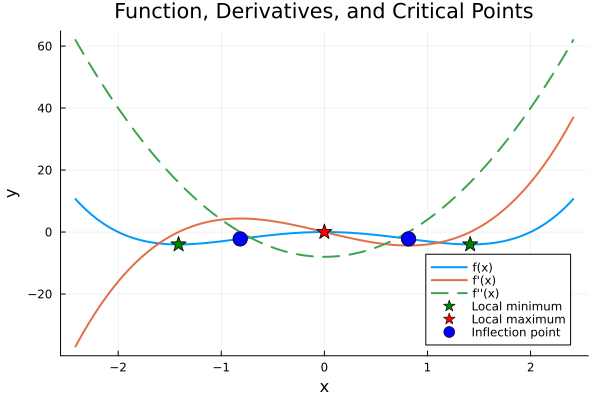

In [3]:

# Define the function f(x) = x^4 - 4x^2
d_expr = x^4 - 4*x^2

# Call the function to analyze and plot, with automatic range and 1000 points
analyze_and_plot_derivatives(d_expr, 1000)

# Function solve Cost Function

In [4]:
# Importing required libraries
using Calculus

In [5]:

# Define the quadratic cost function C(x) = a + b*x + c*x^2
function C(x, a, b, c)
    return a + b*x + c*x^2
end

# Function to calculate marginal cost
function marginal_cost(x, b, c)
    return b + 2*c*x
end

# Function to calculate average cost
function average_cost(x, a, b, c)
    return C(x, a, b, c) / x
end

# Function to calculate the derivative of the average cost
function d_average_cost(x, a, b, c)
    return derivative(y -> average_cost(y, a, b, c), x)
end

# Ask for inputs from the user
println("Enter the constant term (a): ")
a = parse(Float64, readline())

println("Enter the linear term (b): ")
b = parse(Float64, readline())

println("Enter the quadratic term (c): ")
c = parse(Float64, readline())

println("Enter the production level for evaluation: ")
x_value = parse(Float64, readline())

# Part a: The cost at production level x_value
cost_at_x = C(x_value, a, b, c)
println("Cost at production level ", x_value, ": \$", cost_at_x)

# Part b: The average cost at production level x_value
average_cost_at_x = average_cost(x_value, a, b, c)
println("Average cost at production level ", x_value, ": \$", average_cost_at_x)

# Part c: The marginal cost at production level x_value
marginal_cost_at_x = marginal_cost(x_value, b, c)
println("Marginal cost at production level ", x_value, ": \$", marginal_cost_at_x)

# Part d: Find the production level that minimizes the average cost
optimal_production_level = find_zero(x -> d_average_cost(x, a, b, c), 1.0)  # Initial guess of 1.0
println("Optimal production level that minimizes average cost: ", optimal_production_level)

# Part e: The minimal average cost
minimal_average_cost = average_cost(optimal_production_level, a, b, c)
println("Minimal average cost: \$", minimal_average_cost)


Enter the constant term (a): 


stdin>  78400


Enter the linear term (b): 


stdin>  200


Enter the quadratic term (c): 


stdin>  1


Enter the production level for evaluation: 


stdin>  1600


Cost at production level 1600.0: $2.9584e6
Average cost at production level 1600.0: $1849.0
Marginal cost at production level 1600.0: $3400.0
Optimal production level that minimizes average cost: 280.0000000028968
Minimal average cost: $760.0000000000001


# Function solve Profit Function

In [7]:

# Define the profit function P(x)
function P(x, a, b, c)
    return a*x^2 + b*x + c
end

# Function to calculate the marginal profit (derivative of P)
function marginal_profit(x, a, b)
    return 2*a*x + b  # Derivative of the profit function
end

# Ask for inputs from the user
println("Enter the coefficient for x^2 term (a): ")
a = parse(Float64, readline())

println("Enter the coefficient for x term (b): ")
b = parse(Float64, readline())

println("Enter the constant term (c): ")
c = parse(Float64, readline())

println("Enter the number of units sold (x): ")
x_value = parse(Float64, readline())

# Part a: Calculate the profit when a certain number of units are sold
profit_at_x = P(x_value, a, b, c)
println("Profit when ", x_value, " units are sold: \$", profit_at_x)

# Part b: Calculate the average profit per unit
average_profit_per_unit = profit_at_x / x_value
println("Average profit per unit: \$", average_profit_per_unit)

# Part c: Calculate the marginal profit (rate of change of profit)
marginal_profit_at_x = marginal_profit(x_value, a, b)
println("Marginal profit at ", x_value, " units: \$", marginal_profit_at_x)

# Part d: Rate of change in profit between two production levels
println("Enter another number of units sold for comparison: ")
x_value_2 = parse(Float64, readline())
profit_at_x2 = P(x_value_2, a, b, c)
average_change_in_profit = (profit_at_x2 - profit_at_x) / (x_value_2 - x_value)
println("Rate of change in profit between ", x_value, " and ", x_value_2, ": \$", average_change_in_profit)

# Part e: Find the number of units where profit is maximized (i.e., solve P'(x) = 0)
optimal_x = -b / (2*a)  # Since P'(x) = 2ax + b, we solve for x at P'(x) = 0
println("Number of units where profit is maximized: ", optimal_x)

# Maximum profit at the optimal production level
max_profit = P(optimal_x, a, b, c)
println("Maximum profit: \$", max_profit)


Enter the coefficient for x^2 term (a): 


stdin>  -4


Enter the coefficient for x term (b): 


stdin>  1725


Enter the constant term (c): 


stdin>  -8500


Enter the number of units sold (x): 


stdin>  70


Profit when 70.0 units are sold: $92650.0
Average profit per unit: $1323.5714285714287
Marginal profit at 70.0 units: $1165.0
Enter another number of units sold for comparison: 


stdin>  140


Rate of change in profit between 70.0 and 140.0: $885.0
Number of units where profit is maximized: 215.625
Maximum profit: $177476.5625


# Function solve Revenue Function

In [8]:
using Calculus

# Define the revenue function R(x)
function R(x, a, b, c)
    return a*x^2 + b*x + c
end

# Function to calculate the marginal revenue (derivative of R)
function marginal_revenue(x, a, b)
    return 2*a*x + b  # Derivative of the revenue function
end

# Ask for inputs from the user
println("Enter the coefficient for x^2 term (a): ")
a = parse(Float64, readline())

println("Enter the coefficient for x term (b): ")
b = parse(Float64, readline())

println("Enter the constant term (c): ")
c = parse(Float64, readline())

println("Enter the number of units sold (x): ")
x_value = parse(Float64, readline())

# Part a: Calculate the revenue when a certain number of units are sold
revenue_at_x = R(x_value, a, b, c)
println("Revenue when ", x_value, " units are sold: \$", revenue_at_x)

# Part b: Calculate the average revenue per unit
average_revenue_per_unit = revenue_at_x / x_value
println("Average revenue per unit: \$", average_revenue_per_unit)

# Part c: Calculate the marginal revenue (rate of change of revenue)
marginal_revenue_at_x = marginal_revenue(x_value, a, b)
println("Marginal revenue at ", x_value, " units: \$", marginal_revenue_at_x)

# Part d: Rate of change in revenue between two production levels
println("Enter another number of units sold for comparison: ")
x_value_2 = parse(Float64, readline())
revenue_at_x2 = R(x_value_2, a, b, c)
average_change_in_revenue = (revenue_at_x2 - revenue_at_x) / (x_value_2 - x_value)
println("Rate of change in revenue between ", x_value, " and ", x_value_2, ": \$", average_change_in_revenue)

# Part e: Find the number of units where revenue is maximized (i.e., solve R'(x) = 0)
optimal_x = -b / (2*a)  # Since R'(x) = 2ax + b, we solve for x at R'(x) = 0
println("Number of units where revenue is maximized: ", optimal_x)

# Maximum revenue at the optimal production level
max_revenue = R(optimal_x, a, b, c)
println("Maximum revenue: \$", max_revenue)


Enter the coefficient for x^2 term (a): 


stdin>  -4


Enter the coefficient for x term (b): 


stdin>  1725


Enter the constant term (c): 


stdin>  8500


Enter the number of units sold (x): 


stdin>  70


Revenue when 70.0 units are sold: $109650.0
Average revenue per unit: $1566.4285714285713
Marginal revenue at 70.0 units: $1165.0
Enter another number of units sold for comparison: 


stdin>  100


Rate of change in revenue between 70.0 and 100.0: $1045.0
Number of units where revenue is maximized: 215.625
Maximum revenue: $194476.5625
